## 1. Example

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

print(tf.__version__)
print(keras.__version__)

2.1.0
2.2.4-tf


#### Load Data

(b, h, w, c)
(1, 3, 3, 1)


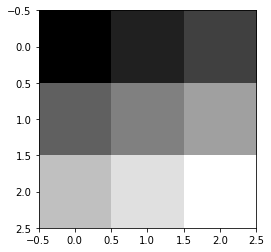

In [2]:
image = tf.constant([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)
print("(b, h, w, c)")
print(image.shape)
plt.imshow(image.numpy().reshape(3,3), cmap='gray')
plt.show()

#### 필터 크기 및 가중치 설정

In [3]:
print("image.shape", image.shape)
weight = np.array([[[[1.]],[[1.]]],
                   [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)


#### Convolution - Padding Comparison

conv2d.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


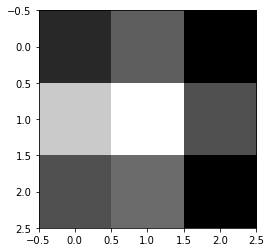

conv2d.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


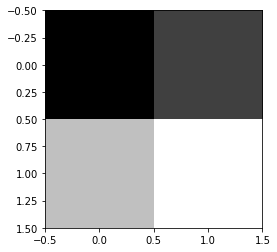

In [4]:
# padding : valid='No', same='On' (depend on stride)
conv2d = keras.layers.Conv2D(filters=1, kernel_size=2, padding='SAME', 
                             kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
print(conv2d.numpy().reshape(3,3))
plt.imshow(conv2d.numpy().reshape(3,3), cmap='gray')
plt.show()

conv2d = keras.layers.Conv2D(filters=1, kernel_size=2, padding='VALID', 
                             kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
print(conv2d.numpy().reshape(2,2))
plt.imshow(conv2d.numpy().reshape(2,2), cmap='gray')
plt.show()

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d.shape (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[ 0.  0. -3.]
 [ 0.  0. -3.]
 [-1. -1.  9.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


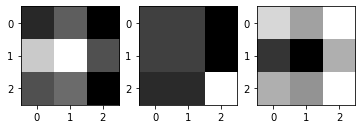

In [5]:
print("image.shape", image.shape)

weight = np.array([[[[1.,1.,-1.]],[[1.,-1.,-1.]]],
                   [[[1.,-1.,-1.]],[[1.,1.,-1.]]]])
print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)
conv2d = keras.layers.Conv2D(filters=3, kernel_size=2, padding='SAME',
                             kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
    print(feature_map.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(feature_map.reshape(3,3), cmap='gray')
plt.show()

#### Pooling - Conparison

############## MaxPooling ##############
conv2d.shape (1, 3, 3, 3)
pool1.shape (1, 3, 3, 3)
[[28. 28. 15.]
 [28. 28. 15.]
 [17. 17.  9.]]
[[ 0.  0. -3.]
 [ 0.  9.  9.]
 [-1.  9.  9.]]
[[-12.  -9.  -9.]
 [-15.  -9.  -9.]
 [-15.  -9.  -9.]]


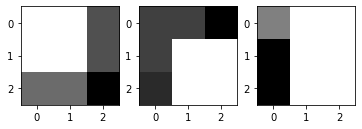

############## AveragePooling ##############
conv2d.shape (1, 3, 3, 3)
pool2.shape (1, 3, 3, 3)
[[20.   17.   12.  ]
 [21.   17.25 12.  ]
 [16.   13.    9.  ]]
[[ 0.   -1.5  -3.  ]
 [-0.5   1.25  3.  ]
 [-1.    4.    9.  ]]
[[-20.   -17.   -12.  ]
 [-21.   -17.25 -12.  ]
 [-16.   -13.    -9.  ]]


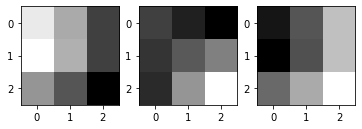

############## Max : Average = 3 : 2 ##############
[[24.8 23.6 13.8]
 [25.2 23.7 13.8]
 [16.6 15.4  9. ]]
[[ 0.  -0.6 -3. ]
 [-0.2  5.9  6.6]
 [-1.   7.   9. ]]
[[-15.2 -12.2 -10.2]
 [-17.4 -12.3 -10.2]
 [-15.4 -10.6  -9. ]]


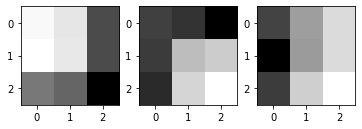

In [6]:
# 1. MaxPolling
print("############## MaxPooling ##############")

print("conv2d.shape", conv2d.shape)

pool1 = keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='SAME')(conv2d)
print("pool1.shape", pool1.shape)
pool_imgs1 = np.swapaxes(pool1, 0, 3)
for i, pool_img in enumerate(pool_imgs1):
    print(pool_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(pool_img.reshape(3,3), cmap='gray')
plt.show()


# 2. AveragePolling
print("############## AveragePooling ##############")

print("conv2d.shape", conv2d.shape)

pool2 = tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=1, padding='SAME')(conv2d)
print("pool2.shape", pool2.shape)
pool_imgs2 = np.swapaxes(pool2, 0, 3)
for i, pool_img in enumerate(pool_imgs2):
    print(pool_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(pool_img.reshape(3,3), cmap='gray')
plt.show()


# 3. Max : Average = 3 : 2
print("############## Max : Average = 3 : 2 ##############")
for i in range(len(pool_imgs1)):
    pool_img = (pool_imgs1[i]*3 + pool_imgs2[i]*2)/5
    print(pool_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(pool_img.reshape(3,3), cmap='gray')
plt.show()

## 2. Application

#### Load Data

(540, 960, 3)
<class 'numpy.ndarray'>


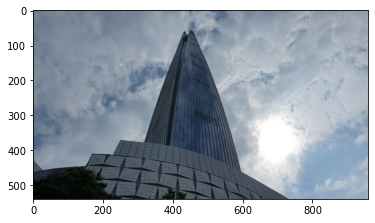

In [7]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import cv2

filePath = "C:/Users/82109/Downloads/롯데월드타워_024.jpg"

stream = open( filePath.encode("utf-8") , "rb")
bytes = bytearray(stream.read())
numpyArray = np.asarray(bytes, dtype=np.uint8)

landmark_1 = cv2.imdecode(numpyArray , cv2.IMREAD_UNCHANGED)

landmark_1 = cv2.cvtColor(landmark_1, cv2.COLOR_BGR2RGB)
landmark_1 = landmark_1.astype(np.float32) / 255.

print(landmark_1.shape)
print(type(landmark_1))

plt.imshow(landmark_1)
plt.show()

#### Convolutaion

conv2d.shape (1, 540, 960, 6)


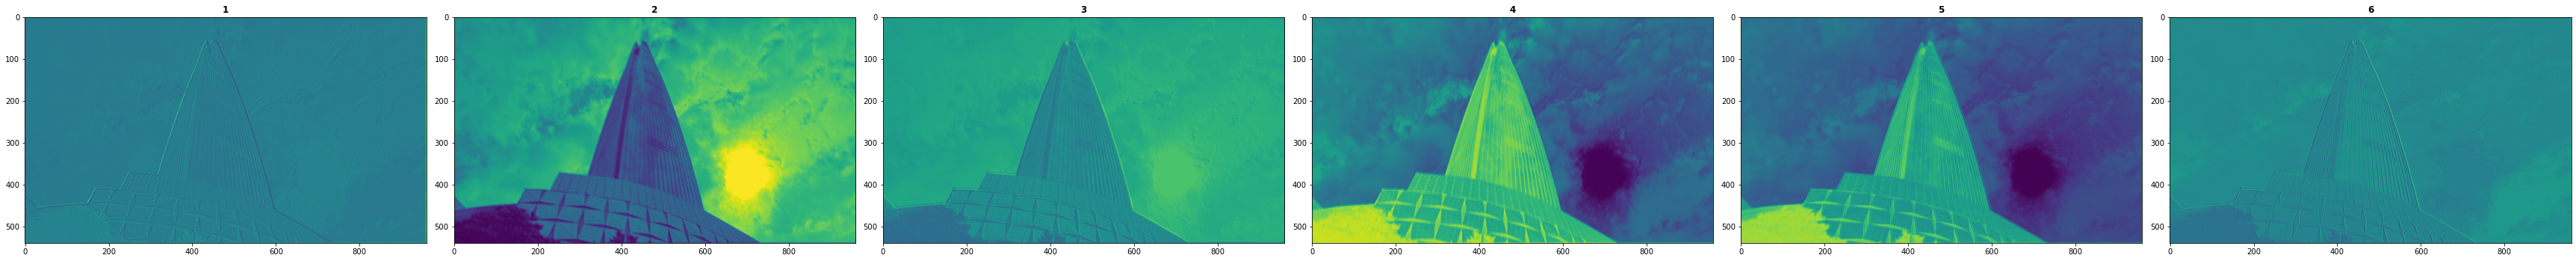

In [8]:
landmark_1 = landmark_1.reshape(1,540,960,3)
landmark_1 = tf.convert_to_tensor(landmark_1)

weight_init = keras.initializers.RandomNormal(stddev=0.01)
conv2d = keras.layers.Conv2D(filters=6, kernel_size=5, padding='SAME',
                             kernel_initializer=weight_init)(landmark_1)
print("conv2d.shape", conv2d.shape)
feature_maps = np.swapaxes(conv2d, 0, 3)

## Plot 1
fig, axes = plt.subplots(1, len(feature_maps), 
                         figsize=(48, 54),
                         tight_layout=True)

for i, feature_map in enumerate(feature_maps):
    axes[i].imshow(feature_map.reshape(540,960))
    axes[i].set_title(str(i+1), fontweight='bold')
plt.show()

## Plot 2
#for i, feature_map in enumerate(feature_maps):
#    #print(feature_map.reshape(540,960))
#    plt.subplot(1,len(feature_maps),i+1), plt.imshow(feature_map.reshape(540,960))
#plt.show()

#### Pooling - Conparison

############## MaxPooling ##############
conv2d.shape (1, 540, 960, 6)
pool1.shape (1, 270, 480, 6)


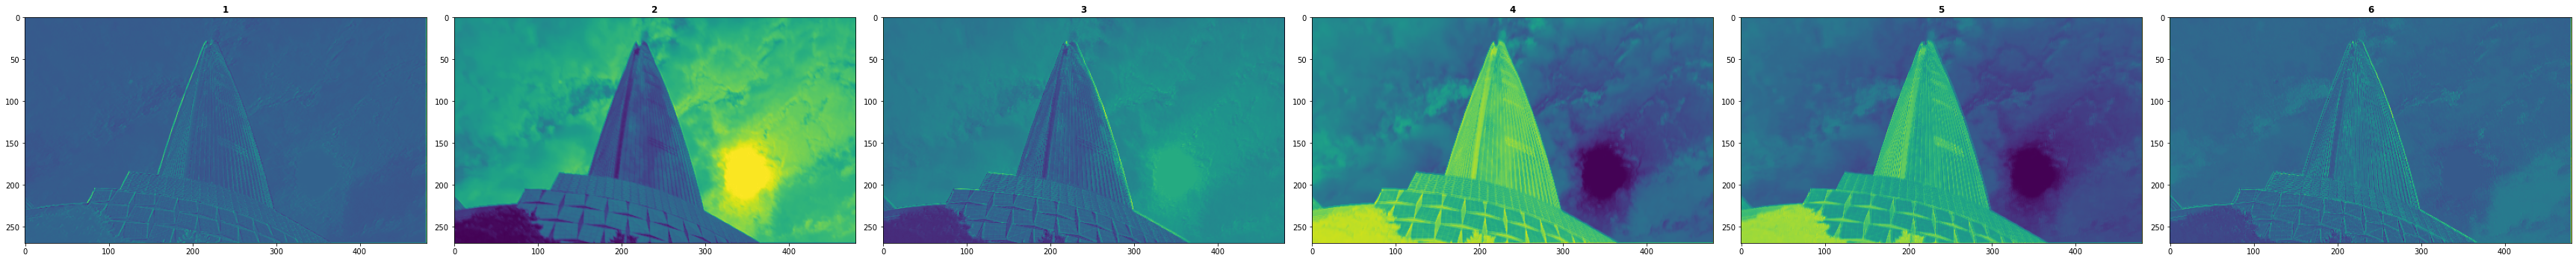

############## AveragePooling ##############
conv2d.shape (1, 540, 960, 6)
pool2.shape (1, 270, 480, 6)


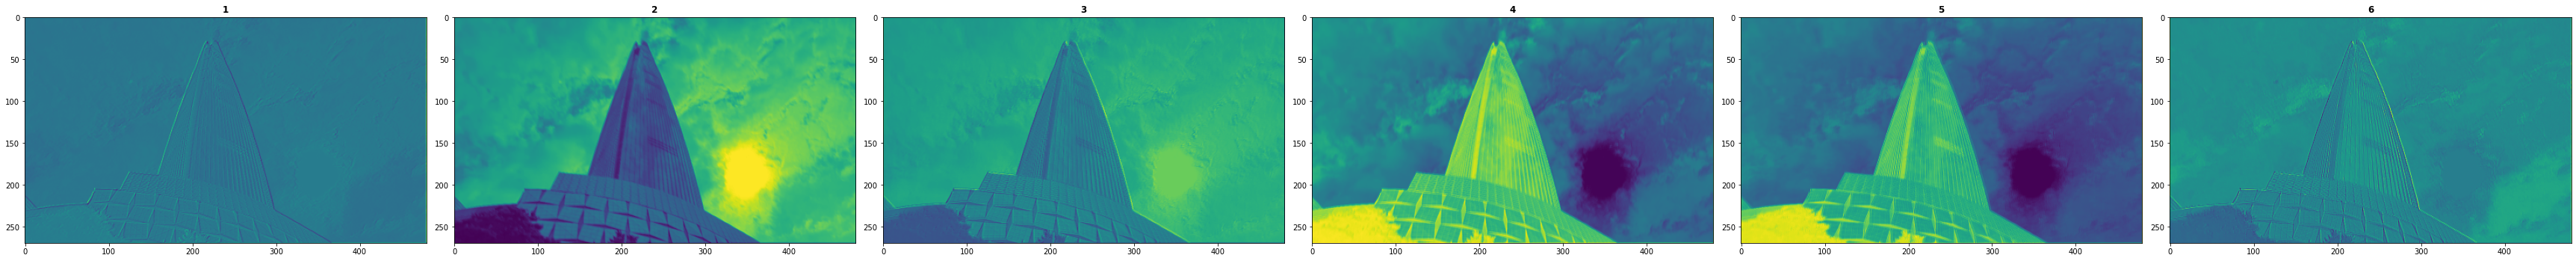

############## Max : Average = 3 : 2 ##############


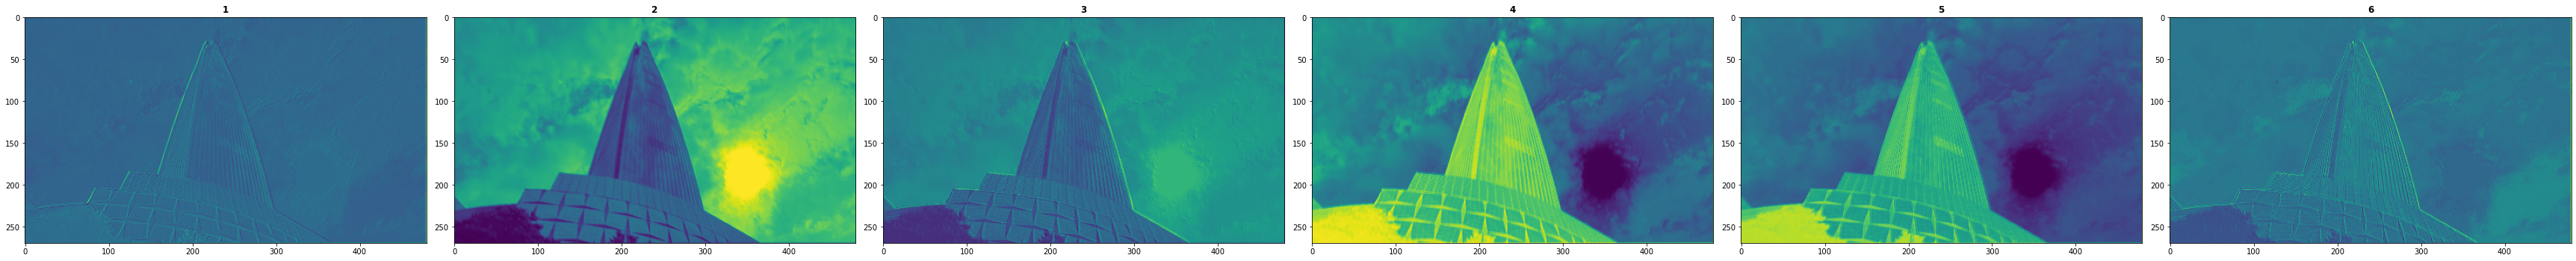

In [9]:
# 1. MaxPolling
print("############## MaxPooling ##############")

print("conv2d.shape", conv2d.shape)

pool1 = keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='SAME')(conv2d)
print("pool1.shape", pool1.shape)
pool_imgs1 = np.swapaxes(pool1, 0, 3)


## Plot 1
fig, axes = plt.subplots(1, len(pool_imgs1), 
                         figsize=(48, 54),
                         tight_layout=True)


for i, pool_img in enumerate(pool_imgs1):
    axes[i].imshow(pool_img.reshape(270,480))
    axes[i].set_title(str(i+1), fontweight='bold')
plt.show()

## Plot 2
#for i, pool_img in enumerate(pool_imgs1):
#    #print(pool_img.reshape(540,960))
#    plt.subplot(1,len(pool_imgs1),i+1), plt.imshow(pool_img.reshape(270,480))
#plt.show()


# 2. AveragePolling
print("############## AveragePooling ##############")

print("conv2d.shape", conv2d.shape)

pool2 = keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='SAME')(conv2d)
print("pool2.shape", pool2.shape)
pool_imgs2 = np.swapaxes(pool2, 0, 3)


## Plot 1
fig, axes = plt.subplots(1, len(pool_imgs2), 
                         figsize=(48, 54),
                         tight_layout=True)


for i, pool_img in enumerate(pool_imgs2):
    axes[i].imshow(pool_img.reshape(270,480))
    axes[i].set_title(str(i+1), fontweight='bold')
plt.show()


# 3. Max : Average = 3 : 2
print("############## Max : Average = 3 : 2 ##############")

fig, axes = plt.subplots(1, len(pool_imgs1), 
                         figsize=(48, 54),
                         tight_layout=True)

for i in range(len(pool_imgs1)):
    pool_img = (pool_imgs1[i]*3 + pool_imgs2[i]*2)/5
    #print(pool_img.reshape(270,480))
    axes[i].imshow(pool_img.reshape(270,480))
    axes[i].set_title(str(i+1), fontweight='bold')
plt.show()